In [1]:
import matplotlib.pyplot as plt
import numpy as np
from constants import CACHE_PATH, MASS_BINS

In [2]:
def se_jack(jacks, meanjk, num):
    if jacks.ndim == 1:
        return np.sqrt(np.sum(np.square(jacks - meanjk), axis=0) * (num-1)/num)
    else:
        return np.sqrt(np.sum(np.square(jacks - meanjk[:, None]), axis=1) * (num-1)/num)


In [13]:
total = np.load(f'{CACHE_PATH}/jackknife_cvirs.npy')
_, num = total[:, 4:-1].shape

In [14]:
total2 = np.loadtxt(f'{CACHE_PATH}/jackknife_cvirs_lor.out')
_, num = total2[:, 4:-1].shape

In [15]:
jacks = total[:, 4:-1]
meanjk = total[:, -1]
se_jk = np.sqrt(np.sum(np.square(jacks - meanjk[:, None]), axis=1) * (num-1)/num)

In [16]:
jacks = total2[:, 4:-1]
meanjk = total2[:, -1]
se_jk_2 = np.sqrt(np.sum(np.square(jacks - meanjk[:, None]), axis=1) * (num-1)/num)

In [5]:
slices = [0, 100, 200, 300, 400, 500, 561, 595, 611]

In [39]:
x = np.array([])
y = np.array([])
y2 = np.array([])
y3 = np.array([])
y4 = np.array([])
y5 = np.array([])
z = np.array([])
for i in range(8):
    y = np.append(y, np.mean(se_jk[slices[i]: slices[i + 1] + 1]))
    y2 = np.append(y2, np.std(total[slices[i]: slices[i + 1] + 1, 2]))
    y3 = np.append(y3, np.std(total[slices[i]: slices[i + 1] + 1, 3]))
    y4 = np.append(y4, np.std(total2[slices[i]: slices[i + 1] + 1, 3]))
    y5 = np.append(y5, np.mean(se_jk_2[slices[i]: slices[i + 1] + 1]))
    z =  np.append(z, np.mean(total[slices[i]: slices[i + 1] + 1, 2]))
    x = np.append(x, np.mean([MASS_BINS[i], MASS_BINS[i + 1]]))

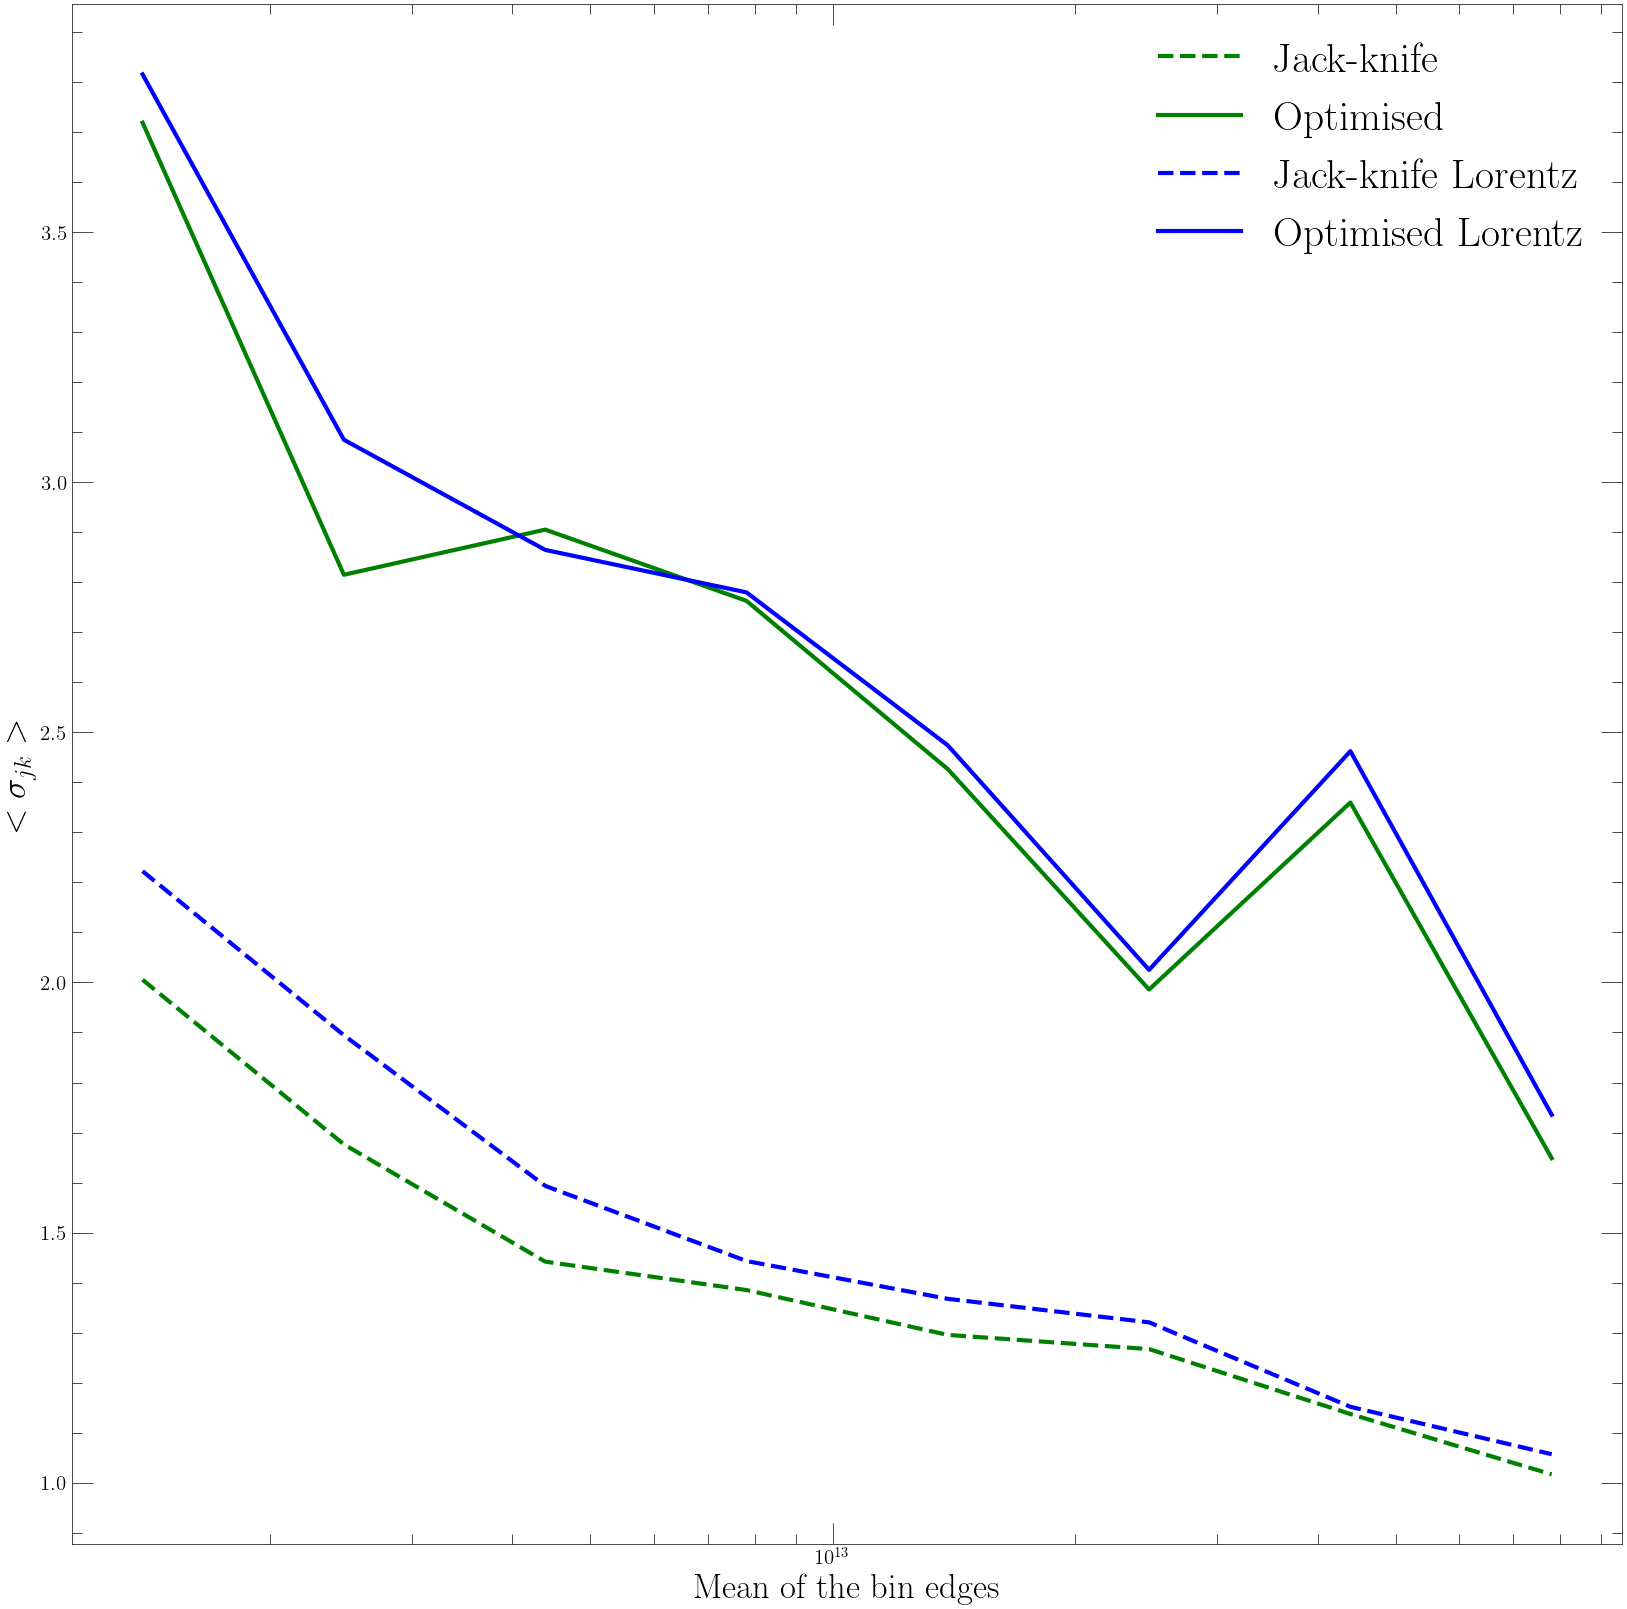

In [36]:
plt.plot(x, y, 'g--', linewidth=3, label='Jack-knife')
# plt.plot(x, y2, label='Intrensic')
plt.plot(x, y3, 'g', linewidth=3, label='Optimised')
plt.plot(x, y5, 'b--', linewidth=3, label='Jack-knife Lorentz')
plt.plot(x, y4, 'b', linewidth=3, label='Optimised Lorentz')
plt.ylabel(r'$<\sigma_{jk}>$')
plt.xlabel('Mean of the bin edges')
plt.xscale('log')
plt.legend()

In [37]:
x = np.array([])
y = np.array([])
y2 = np.array([])
for i in range(8):
    y = np.append(y, np.std(se_jk[slices[i]: slices[i + 1] + 1]))
    y2 = np.append(y2, np.std(se_jk_2[slices[i]: slices[i + 1] + 1]))
    x = np.append(x, np.mean([MASS_BINS[i], MASS_BINS[i + 1]]))

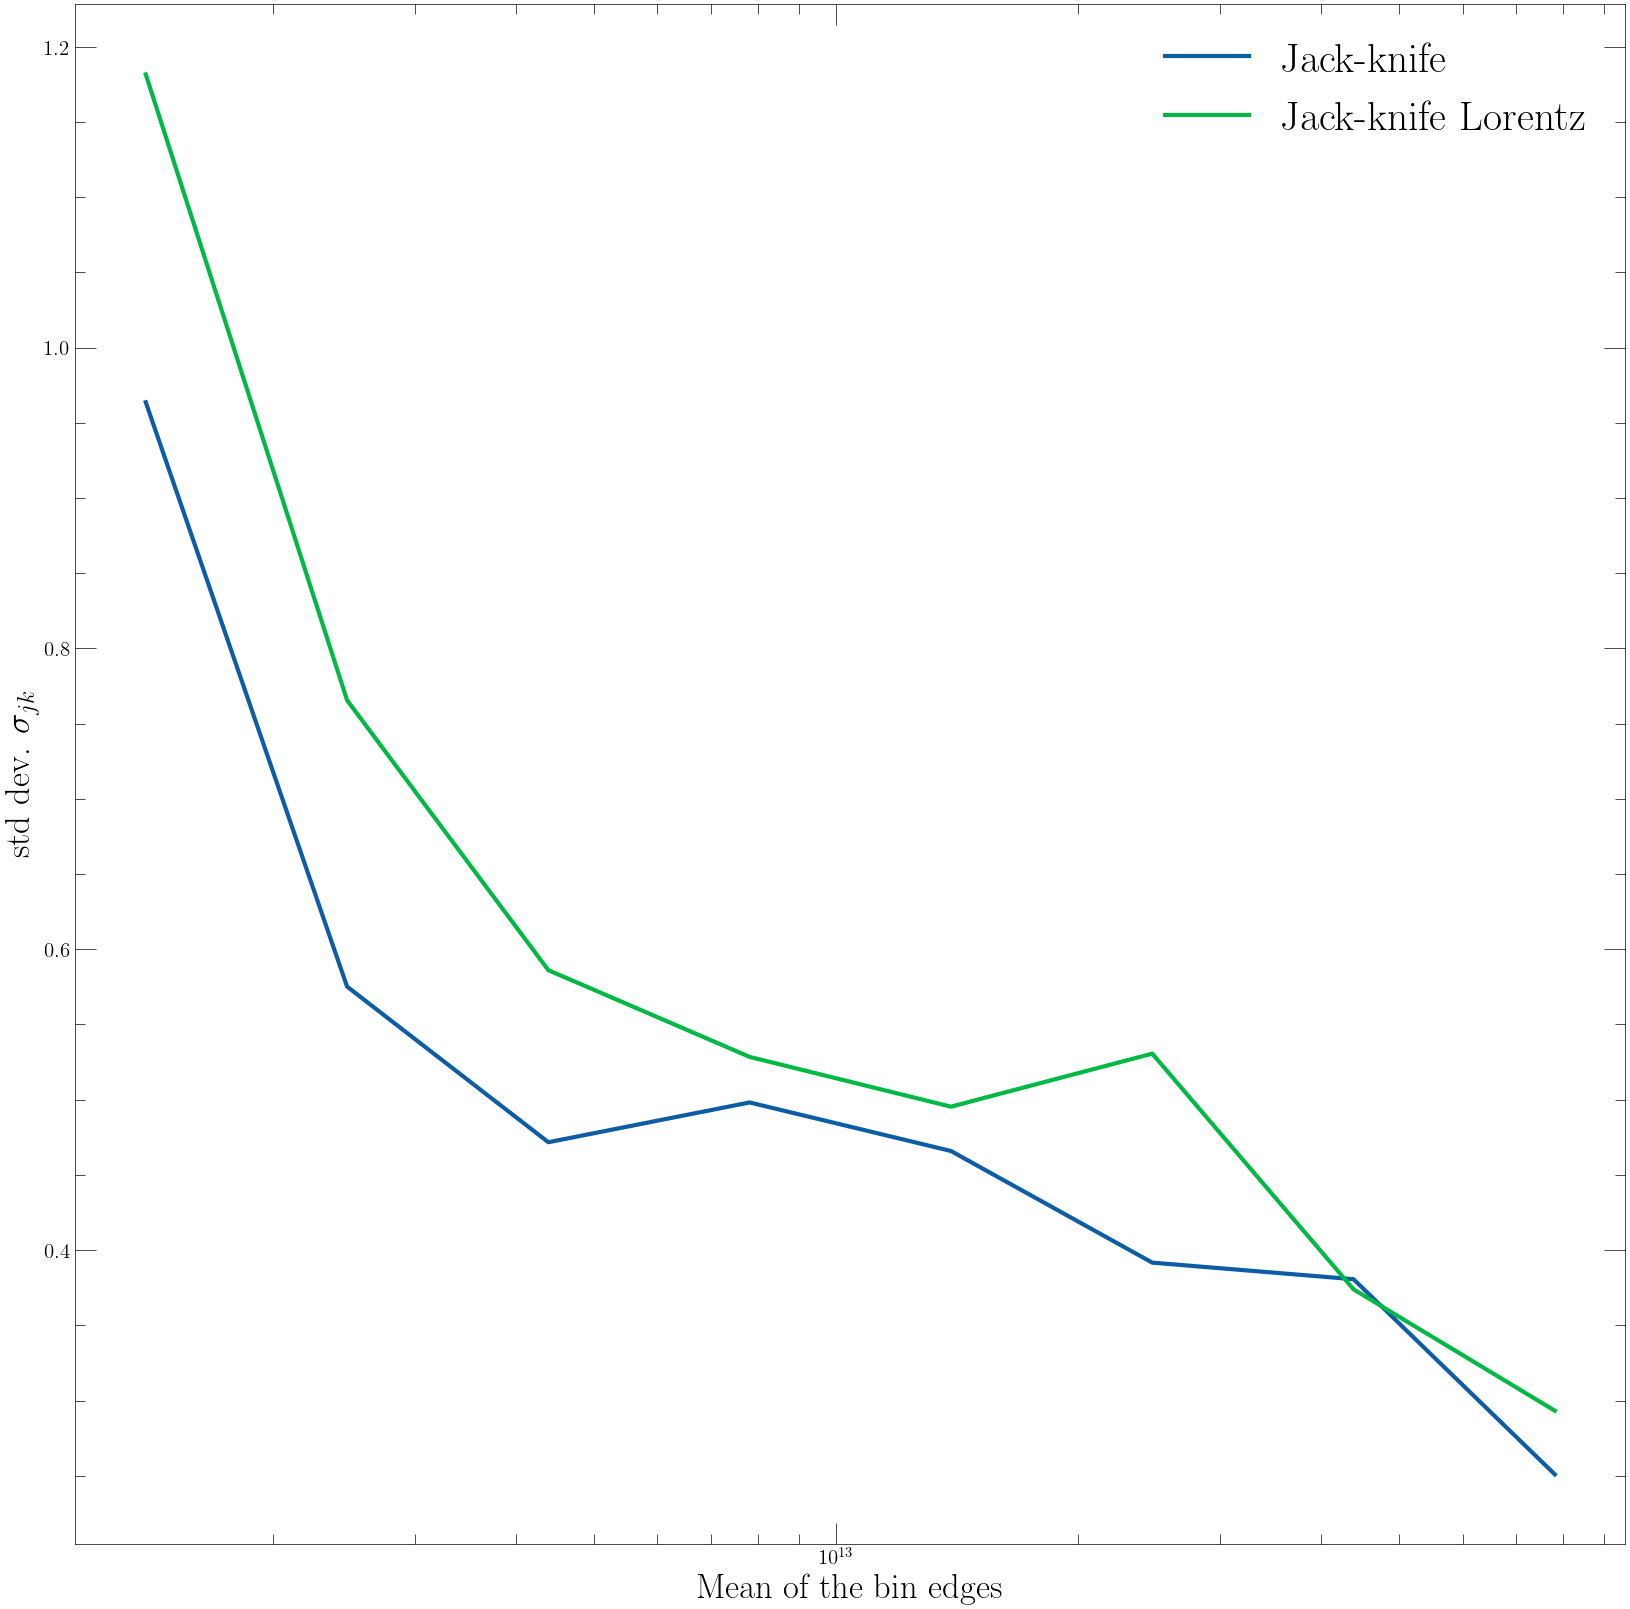

In [38]:
# make sure to change y to have std instead of mean
plt.plot(x, y, linewidth=3, label='Jack-knife')
plt.plot(x, y2, linewidth=3, label='Jack-knife Lorentz')
plt.ylabel(r'std dev. $\sigma_{jk}$')
plt.xlabel('Mean of the bin edges')
plt.xscale('log')
plt.legend()

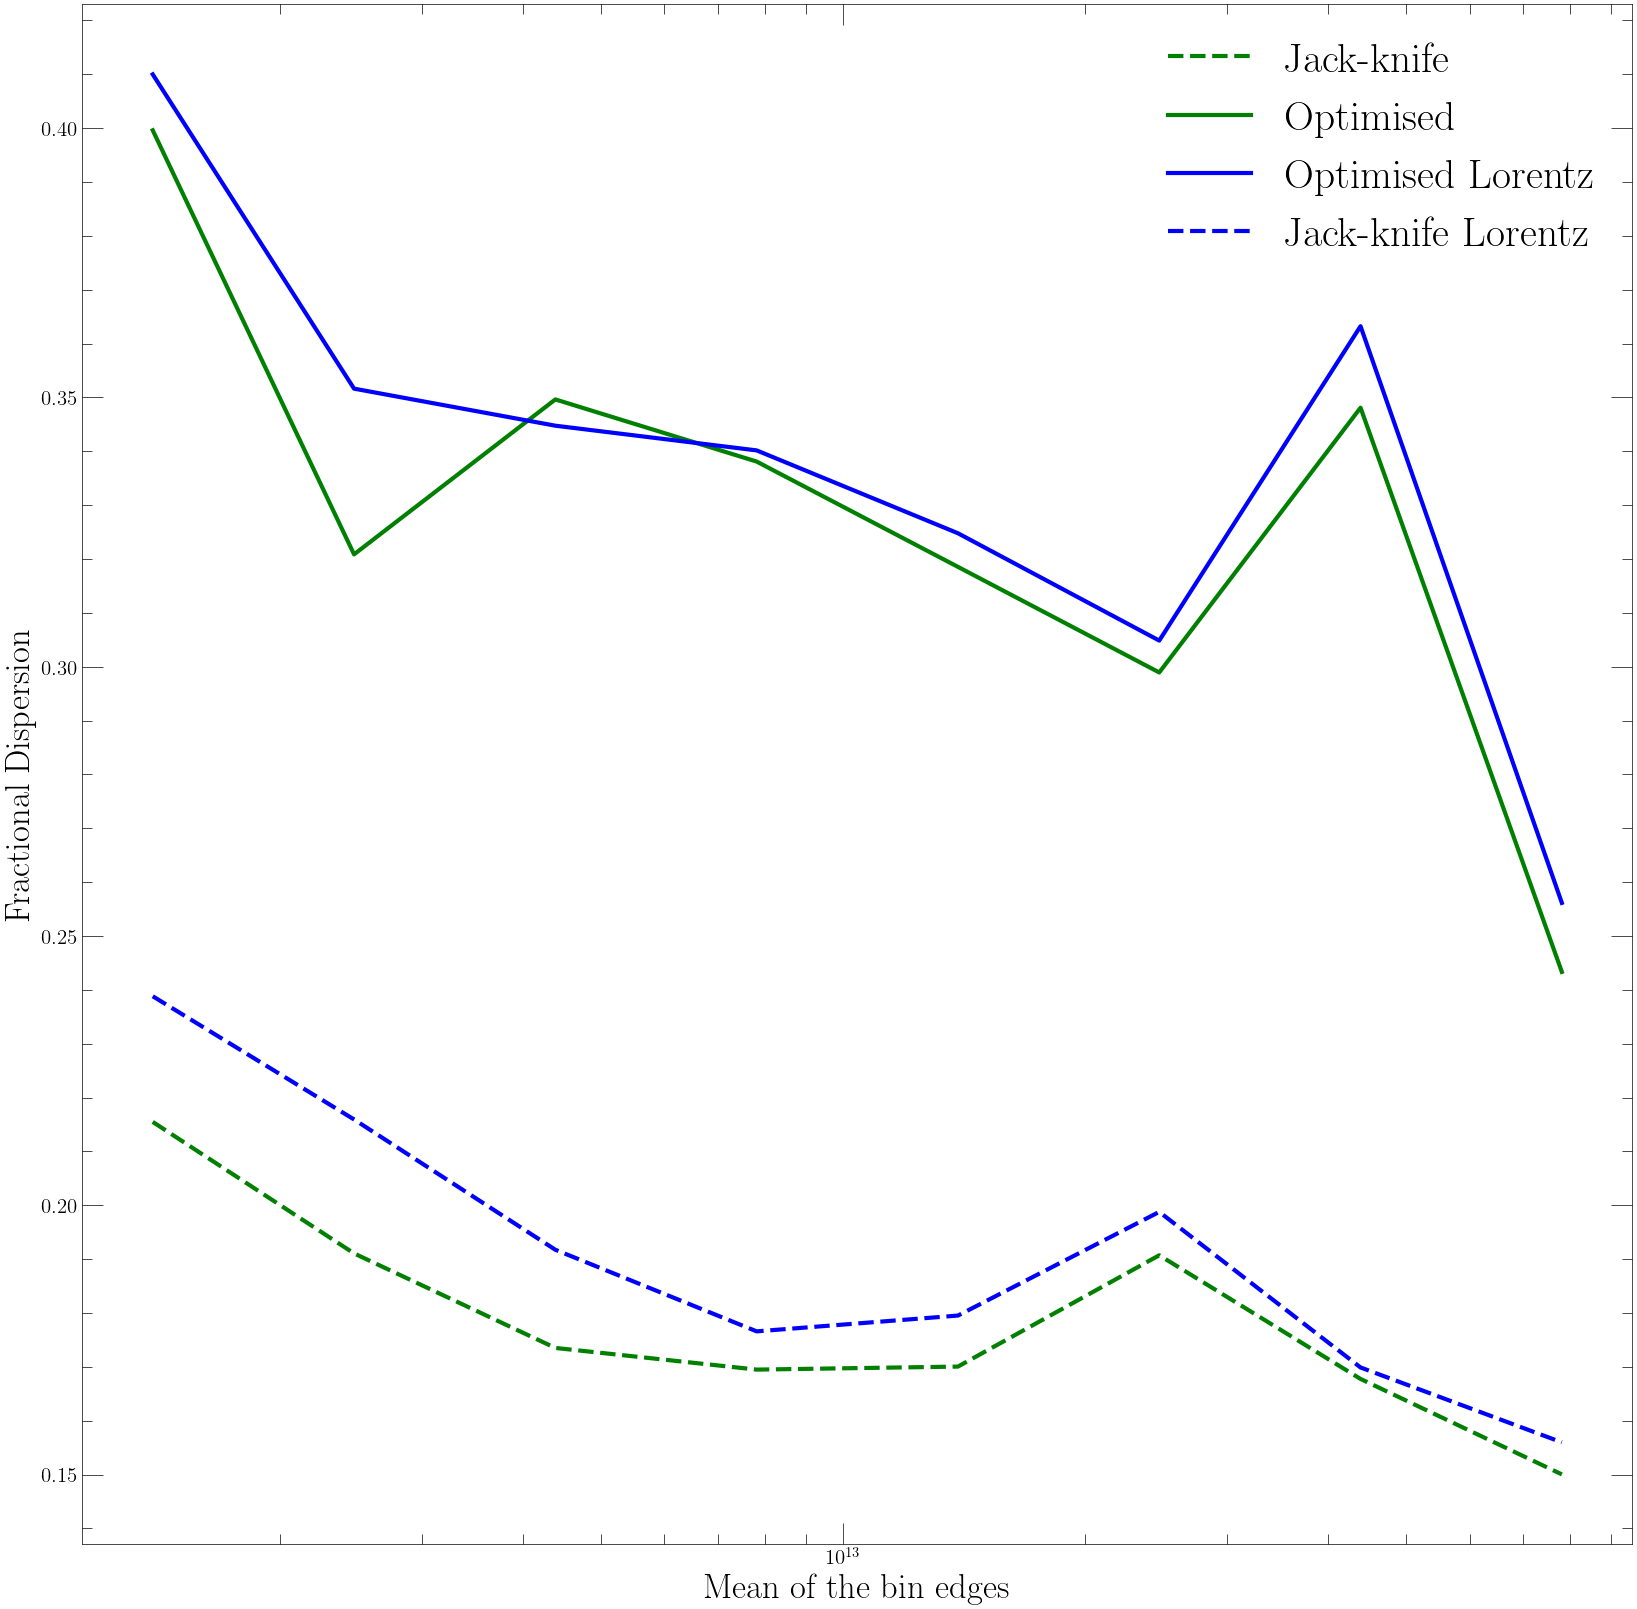

In [46]:
plt.plot(x, y/z, 'g--', linewidth=3, label='Jack-knife')
# plt.plot(x, y2/z, label='Intrinsic')
plt.plot(x, y3/z, 'g', linewidth=3, label='Optimised')
plt.plot(x, y4/z, 'b', linewidth=3, label='Optimised Lorentz')
plt.plot(x, y5/z, 'b--', linewidth=3, label='Jack-knife Lorentz')
plt.ylabel(r'Fractional Dispersion')
plt.xlabel('Mean of the bin edges')
plt.xscale('log')
plt.legend()